# Titanic Survival Prediction

The aim of this exercise is to use the Titanic passenger data (name, age, price of ticket, etc) to try to predict who will survive and who will die.

We have 3 files which we will be using:
1. **train.csv**
2. **test.csv**

It is important to note that this forms part of the "Kaggle Titanic Tutorial", however I decided to modify it.

### Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

We will now load the data from train.csv and test.csv, and also analyze what both datasets look like.

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We notice that there is a column to identify whether a person survived or not, and if the person survived, it is denoted by a "1".

In [3]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


We can also notice that the total number of entries is 891 in the training set indicating that there was a total of 891 passengers onboard the Titanic.

You will notice the train dataset is larger than the test dataset. This is because you always use atleast 80% for training and 20% for testing. 

In [4]:
train_data.shape

(891, 12)

In [5]:
test_data.shape

(418, 11)

### Which gender has the highest survival rate?

In [6]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

Plot the result on a Pie Chart

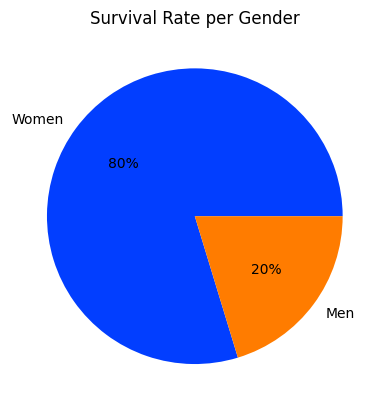

In [7]:
# declaring data
data = [rate_women, rate_men]
keys = ['Women', 'Men']
  
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')

# Adding a title
plt.title('Survival Rate per Gender')
  
# displaying chart
plt.show()

### Prediction

We will use the **Random Forest Model** as it used for classification and regression tasks due to its high accuracy, robustness, feature importance, versatility, and scalability. Random Forest reduces overfitting by averaging multiple decision trees and is less sensitive to noise and outliers in the data.

We will construct 100 trees that will individually consider each passenger's data and vote on whether the individual survived. Then, the random forest model makes a democratic decision: the outcome with the most votes wins.

The code cell below looks for patterns in four different columns *("Pclass", "Sex", "SibSp", and "Parch"* of the data. It constructs the trees in the random forest model based on patterns in the **train.csv** file, before generating predictions for the passengers in **test.csv**. The code also saves these new predictions in a CSV file **submission.csv**.

In [8]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]

# The get_dummies function is used to convert categorical variables into dummy or indicator variables
# A dummy or indicator variable can have a value of 0 or 1.
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

# Writes the predictions to a new .csv file
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('prediction.csv', index=False)
print("Your prediction file was successfully saved!")

Your prediction file was successfully saved!
